<a href="https://colab.research.google.com/github/mocccca/cmor438/blob/main/Unsupervised%20Learning/PCA/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

**Principal Component Analysis (PCA)** is a dimensionality reduction technique used to transform a large set of variables into a smaller set of uncorrelated components (principal components) that retain most of the data’s variance.  
It is commonly applied to simplify datasets, reduce noise, and identify underlying patterns or structures.



## General Process

1. **Input**
   A dataset with multiple continuous features.

2. **Standardization**
   Center and scale the data so each feature has mean = 0 and variance = 1.

3. **Covariance Matrix Calculation**
   Compute the covariance matrix to understand how variables relate.

4. **Compute Eigenvectors and Eigenvalues**
   - Eigenvectors determine the **principal components** (directions of maximum variance).
   - Eigenvalues indicate the amount of variance explained by each component.

5. **Select Top Components**
   Retain the top **k** principal components that capture the most variance.

6. **Transform Data**
   Project the original data onto the reduced component space.



## Advantages of PCA

- **Reduces Dimensionality**
  Simplifies models by reducing the number of input features while retaining most information.

- **Removes Multicollinearity**
  Transforms correlated variables into uncorrelated principal components.

- **Improves Computational Efficiency**
  Speeds up training time for predictive models on large datasets.

- **Enhances Visualization**
  Enables meaningful low-dimensional visualizations of high-dimensional data.



## Disadvantages of PCA

- **Loss of Interpretability**
  Principal components are linear combinations of original variables, making them less intuitive.

- **Assumes Linearity**
  Captures only linear relationships between variables.

- **Sensitive to Scaling**
  Requires proper data standardization for meaningful results.

- **Can Discard Important but Small-Variance Signals**
  Small variance dimensions may still be meaningful but get dropped.


## Application

In this project, PCA was used to reduce and explore predictors of **workaholism** based on personality and vocational interest measures.



### Input Variables

- **Big Five Personality Dimensions**
  - `neuroticism_composite`
  - `ip_extraversion_composite`
  - `ip_openness_composite`
  - `ip_agreeableness_composite`
  - `ip_conscientiousness_composite`

- **RIASEC Vocational Interests**
  - `ip_realistic`
  - `ip_investigative`
  - `ip_artistic`
  - `ip_social`
  - `ip_enterprising`
  - `ip_conventional`



### Output Variable: Workaholism

Measured using the **Multidimensional Workaholism Scale (MWS; Clark et al., 2016)**:  Participants 16 items on workaholism on a scale from 1 (Never true) to 5 (Always true), and we composited the score to be `workaholism_composite`, serving as the target variable.

### Goal

The goal was to apply **PCA** to the combined Big Five and RIASEC predictor set, identifying key underlying components, reducing feature space, and exploring their relationship to participants’ **workaholism levels**.  
This approach aimed to uncover principal personality and vocational patterns driving compulsive work behaviors.



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/mocccca/cmor438/main/Leisure_Intereset_Dataset.csv"
li = pd.read_csv(url)
li1 = li[['workaholism_composite', 'extraversion_composite', 'agreeableness_composite', 'conscientiousness_composite', 'neuroticism_composite', 'openness_composite']].copy()
li1['ip_realistic'] = li['ipa_realistic'].combine_first(li['ipb_realistic'])
li1['ip_investigative'] = li['ipa_investigative'].combine_first(li['ipb_investigative'])
li1['ip_artistic'] = li['ipa_artistic'].combine_first(li['ipb_artistic'])
li1['ip_social'] = li['ipa_social'].combine_first(li['ipb_social'])
li1['ip_enterprising'] = li['ipa_enterprising'].combine_first(li['ipb_enterprising'])
li1['ip_conventional'] = li['ipa_conventional'].combine_first(li['ipb_conventional'])

li1

,workaholism_composite,extraversion_composite,agreeableness_composite,conscientiousness_composite,neuroticism_composite,openness_composite,ip_realistic,ip_investigative,ip_artistic,ip_social,ip_enterprising,ip_conventional
0,51,48,35,41,43,35,25.0,27.0,27.0,29.0,25.0,26.0
1,58,37,38,33,40,41,26.0,33.0,34.0,35.0,34.0,33.0
2,28,43,41,39,39,37,24.0,26.0,24.0,16.0,20.0,19.0
3,60,36,41,43,37,35,21.0,27.0,24.0,22.0,24.0,18.0
4,48,36,39,32,35,34,24.0,23.0,27.0,24.0,27.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
116,58,37,38,35,34,42,15.0,12.0,31.0,25.0,22.0,15.0
117,36,36,36,36,34,37,27.0,24.0,14.0,17.0,19.0,25.0
118,48,39,42,39,37,35,29.0,34.0,34.0,32.0,33.0,35.0
119,67,39,36,35,34,36,12.0,29.0,37.0,14.0,28.0,31.0


In [ ]:
# Separate features (X) and target (y)
X = li1.drop('workaholism_composite', axis=1)
y = li1['workaholism_composite']

# Standardize features (critical for PCA/regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

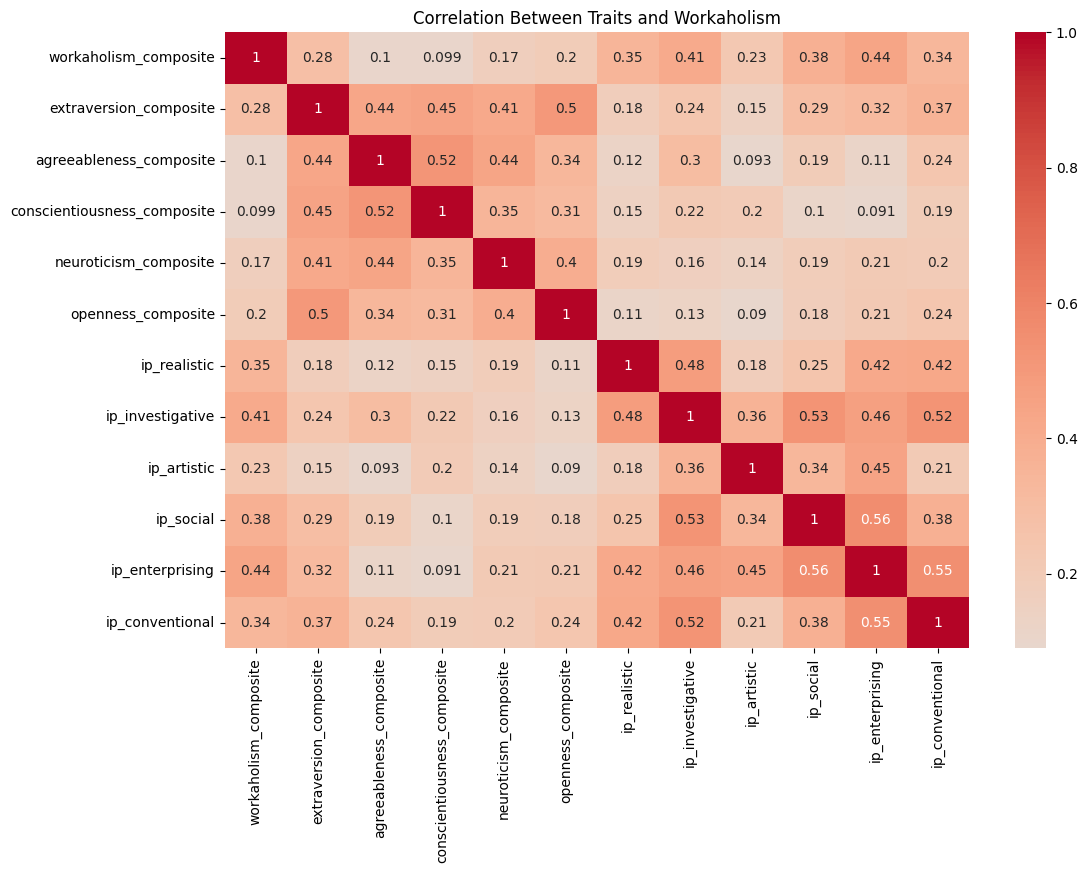

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr = li1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Traits and Workaholism")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Variance explained
print("Explained variance:", pca.explained_variance_ratio_.cumsum())

# Plot loadings
loadings = pd.DataFrame(pca.components_.T,
                       columns=[f"PC{i+1}" for i in range(pca.n_components_)],
                       index=X.columns)
print(loadings)

Explained variance: [0.3581211  0.52467945 0.60832164 0.68826556 0.75262104 0.81217312
 0.86015188 0.90443482 0.9402455  0.9752422 ]
                                  PC1       PC2       PC3       PC4       PC5  \
extraversion_composite       0.334655  0.293661 -0.013865  0.271329 -0.118444   
agreeableness_composite      0.283727  0.381225 -0.018975 -0.359038 -0.318546   
conscientiousness_composite  0.261659  0.378441  0.122054 -0.469716  0.030345   
neuroticism_composite        0.272064  0.330773  0.015872  0.103688  0.394774   
openness_composite           0.260437  0.336297 -0.023887  0.519023  0.128699   
ip_realistic                 0.269789 -0.244233 -0.533586 -0.217777  0.499011   
ip_investigative             0.350740 -0.274548 -0.097545 -0.320765 -0.232765   
ip_artistic                  0.238463 -0.227498  0.705838 -0.175815  0.395740   
ip_social                    0.319549 -0.262784  0.238404  0.184218 -0.469352   
ip_enterprising              0.349406 -0.331108  0.102438

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")

R²: 0.32
MAE: 8.01


R² = 0.32: The model explains 32% of workaholism variance — moderate but meaningful for psychological data.

MAE = 8.01: Average prediction error is ~8 units on the workaholism scale (context-dependent).

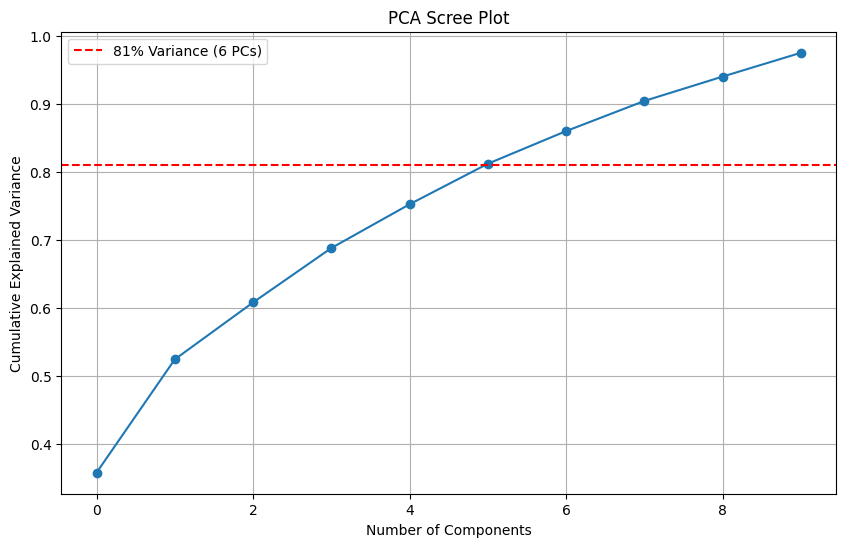

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.axhline(y=0.81, color='r', linestyle='--', label='81% Variance (6 PCs)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.legend()
plt.grid()
plt.show()

6 PCs (81% variance) would be a balance between simplicity and information retention.

In [ ]:
from sklearn.linear_model import Ridge

# Fit Ridge regression (L2 penalty)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [ ]:
# Test performance with different feature sets
feature_sets = {
    "Big Five Only": ['extraversion_composite', 'agreeableness_composite',
                     'conscientiousness_composite', 'neuroticism_composite',
                     'openness_composite'],
    "RIASEC Only": ['ip_realistic', 'ip_investigative', 'ip_artistic',
                    'ip_social', 'ip_enterprising', 'ip_conventional'],
    "All Features": X.columns.tolist(),
    "Top 4 PCA Components": X_pca[:, :4]  # First 4 PCs
}

results = []
for name, features in feature_sets.items():
    if "PCA" in name:
        X_subset = X_pca[:, :4]
    else:
        X_subset = X_scaled[:, [X.columns.get_loc(f) for f in features]]

    model = LinearRegression().fit(X_subset, y)
    y_pred = model.predict(X_subset)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    results.append({'Feature Set': name, 'R²': r2, 'MAE': mae})

results_df = pd.DataFrame(results)
print(results_df)

            Feature Set        R²        MAE
0         Big Five Only  0.089676  11.667257
1           RIASEC Only  0.268710  10.212571
2          All Features  0.289637  10.107877
3  Top 4 PCA Components  0.273254  10.118966


RIASEC explains more variance in workaholism than personality traits.

In [ ]:
# Get coefficients (standardized data)
coefs = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
coefs.sort_values('Coefficient', ascending=False, inplace=True)
print(coefs)

                             Coefficient
ip_investigative                2.759508
extraversion_composite          2.602371
ip_social                       1.916620
ip_enterprising                 1.690033
ip_realistic                    1.511779
openness_composite              0.905442
ip_artistic                     0.527508
ip_conventional                 0.416407
neuroticism_composite           0.414706
conscientiousness_composite    -0.471279
agreeableness_composite        -1.338539


very interesting that people who prioritize harmony (more agreeable) may avoid overwork.

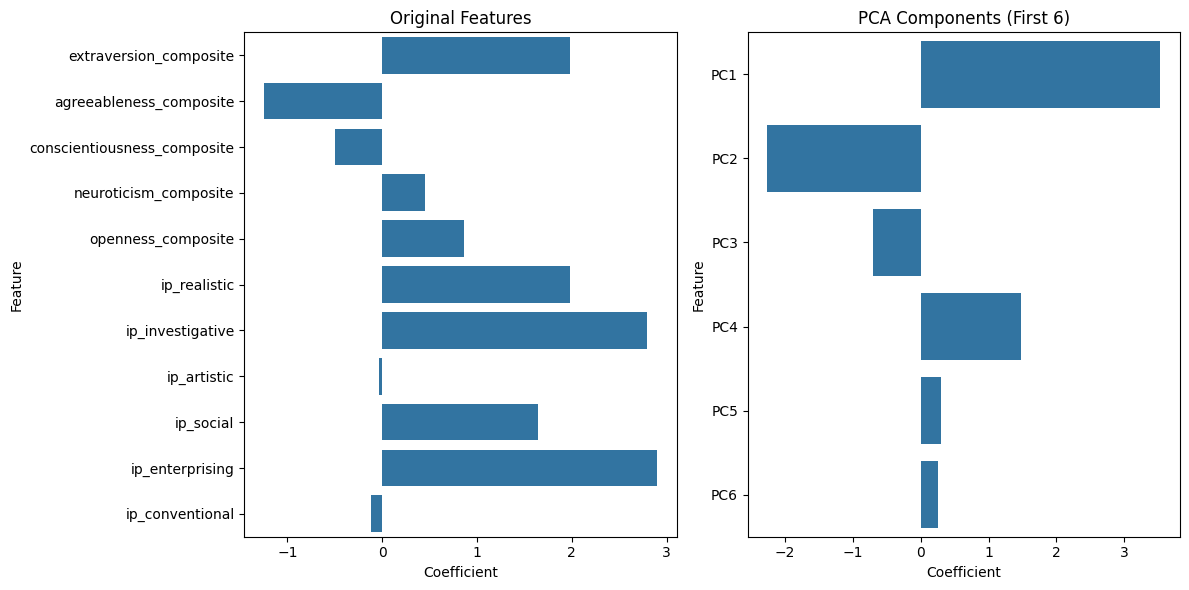

In [ ]:
# Original features
model_original = LinearRegression().fit(X_scaled, y)
coefs_original = pd.DataFrame({'Feature': X.columns,
                               'Coefficient': model_original.coef_})

# PCA-transformed features (first 6 PCs)
model_pca = LinearRegression().fit(X_pca[:, :6], y)
coefs_pca = pd.DataFrame({'Feature': [f'PC{i+1}' for i in range(6)],
                          'Coefficient': model_pca.coef_})

# Plot comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=coefs_original, x='Coefficient', y='Feature')
plt.title('Original Features')

plt.subplot(1, 2, 2)
sns.barplot(data=coefs_pca, x='Coefficient', y='Feature')
plt.title('PCA Components (First 6)')
plt.tight_layout()
plt.show()